In [4]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [5]:
#Getting the data and puting it in object 'electricity_consumption_data'
electricity_consumption_data = pd.read_excel(r"Junior_data_Analyst _ Data.xlsx",parse_dates = ["Date_hour_start"],skiprows=2,nrows=8760)
electricity_consumption_data

,Hour,Date_hour_start,Solar_electricity_generation_kWh,Electricity_usage_kWh
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [6]:
# Unifying all the naming conventions to lower characters to ensure code consistency and maintainability:
electricity_consumption_data.columns = electricity_consumption_data.columns.str.lower()
electricity_consumption_data.columns

Index(['hour', 'date_hour_start', 'solar_electricity_generation_kwh',
       'electricity_usage_kwh '],
      dtype='object')

In [7]:
#Checking the statistical measures 
electricity_consumption_data.describe() 

,hour,date_hour_start,solar_electricity_generation_kwh,electricity_usage_kwh
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [8]:
# checking information in the data                                                       
electricity_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   hour                              8760 non-null   int64         
 1   date_hour_start                   8760 non-null   datetime64[ns]
 2   solar_electricity_generation_kwh  8760 non-null   float64       
 3   electricity_usage_kwh             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [9]:
#Checking for Missing values in the data
electricity_consumption_data.isnull().sum()

hour                                0
date_hour_start                     0
solar_electricity_generation_kwh    0
electricity_usage_kwh               0
dtype: int64

In [10]:
#creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day,
# i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.
agg_data = electricity_consumption_data.groupby('hour')[['solar_electricity_generation_kwh','electricity_usage_kwh ']].agg([np.mean]).reset_index()
agg_data


,hour,solar_electricity_generation_kwh,electricity_usage_kwh
,,mean,mean
0,0,0.000000,0.816471
1,1,0.035753,0.401552
2,2,0.000000,0.250623
3,3,0.000000,0.407688
4,4,0.078559,0.552038
5,5,0.270625,0.610852
6,6,0.722868,2.084071
7,7,1.394885,1.788123
8,8,2.206044,1.798899


Text(0.5, 1.0, 'Boxplot of Electricity usage')

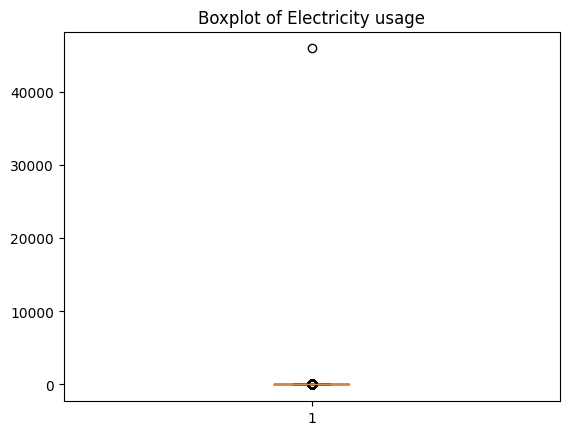

In [11]:
#Checking for outliers[Investigating outliers]
plt.boxplot(electricity_consumption_data[['electricity_usage_kwh ']])
plt.title("Boxplot of Electricity usage")

* *Most of the data is concentrated under the 65 value. It is clear that in the above boxplot that the value above 65 is an outlier*

In [12]:
#Checking the Z-score to make the necessary corrections to the data
upper_limit = electricity_consumption_data['electricity_usage_kwh '].mean() + 0.125*electricity_consumption_data['electricity_usage_kwh '].std()
lower_limit = electricity_consumption_data['electricity_usage_kwh '].mean() - 0.01487965*electricity_consumption_data['electricity_usage_kwh '].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 68.7476796214439
lower limit: -0.00034364319954072187


In [13]:
#Using the Z-score to remove outliers to trim the data
new_electricity_consumption_data = electricity_consumption_data.loc[(electricity_consumption_data['electricity_usage_kwh '] < upper_limit) & (electricity_consumption_data['electricity_usage_kwh '] > lower_limit)]
print('Before removing outliers:',len(electricity_consumption_data))
print('After removing outliers:',len(new_electricity_consumption_data))
print('Outliers:',len(electricity_consumption_data)-len(new_electricity_consumption_data))

Before removing outliers: 8760
After removing outliers: 8754
Outliers: 6


In [14]:
electricity_consumption_data = new_electricity_consumption_data

[Text(0.5, 1.0, 'New_Boxplot of Electricity usage')]

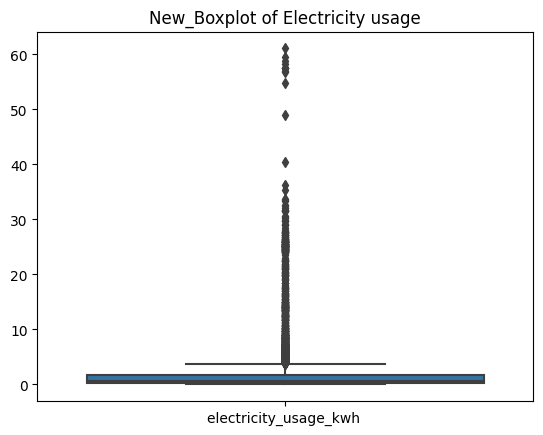

In [15]:
#Checking if the outliers were removed as expected
sns.boxplot(electricity_consumption_data[['electricity_usage_kwh ']]).set(title = "New_Boxplot of Electricity usage")

* *The above display of data is better than the one from before which had extreme values(Outliers)*

### Electricity to be bought for each hour from the electricity provider (measured in kWh and subject to a minimum of zero) 

In [16]:
aggregated_data = electricity_consumption_data.groupby('date_hour_start')['electricity_usage_kwh '].sum().reset_index()
filtered_data = aggregated_data[aggregated_data['electricity_usage_kwh '] > 0]
filtered_data

,date_hour_start,electricity_usage_kwh
0,2020-01-01 00:00:00,1.509849
1,2020-01-01 01:00:00,1.411859
2,2020-01-01 02:00:00,1.023898
3,2020-01-01 03:00:00,0.642000
4,2020-01-01 04:00:00,0.960000
...,...,...
8749,2020-12-31 19:00:00,4.395600
8750,2020-12-31 20:00:00,4.560600
8751,2020-12-31 21:00:00,2.022000
8752,2020-12-31 22:00:00,1.668000


In [17]:
# Calculating net solar electricity generated by creating a bespoke feature from the data we already have
electricity_consumption_data["net_electricity"] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh ']
net_positive = electricity_consumption_data[electricity_consumption_data["net_electricity"] > 0]
net_positive

C:\Users\Ernest\AppData\Local\Temp\ipykernel_14848\2735684331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_consumption_data["net_electricity"] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh ']


,hour,date_hour_start,solar_electricity_generation_kwh,electricity_usage_kwh,net_electricity
9,9,2020-01-01 09:00:00,0.846,0.606,0.240
12,12,2020-01-01 12:00:00,0.651,0.396,0.255
58,10,2020-01-03 10:00:00,1.086,0.897,0.189
59,11,2020-01-03 11:00:00,0.993,0.726,0.267
60,12,2020-01-03 12:00:00,2.031,0.360,1.671
...,...,...,...,...,...
8723,11,2020-12-30 11:00:00,1.383,1.260,0.123
8724,12,2020-12-30 12:00:00,3.957,1.308,2.649
8725,13,2020-12-30 13:00:00,1.641,1.512,0.129
8749,13,2020-12-31 13:00:00,2.535,0.471,2.064


### Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

In [18]:
# Zero kWh at the begining of Jan
# Max charge level + net for each hour
cummulative_charge = electricity_consumption_data["net_electricity"].sum() + 0 
print('The cummulative charge is:', abs(cummulative_charge))

The cummulative charge is: 8303.1522628


### Calculating the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

In [19]:
#This is similar to the time when there is a net_electricity is negative and adding the stored power in the battery
electricity_consumption_data["net_electricity"] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh ']
negative_data = electricity_consumption_data["net_electricity"]
negative_values = electricity_consumption_data[electricity_consumption_data["net_electricity"] < 0]

#We would need to sum the net negative electricity values to know the time when the solar electricity was supplemented by buying
bought_electricity = negative_values['net_electricity'].sum()
#We need to know the amount of net positive electricity that was stored
print('The amount of electricity that would have been bought is:', abs(bought_electricity))

The amount of electricity that would have been bought is: 15625.2482944


C:\Users\Ernest\AppData\Local\Temp\ipykernel_14848\972939509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_consumption_data["net_electricity"] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh ']


* *The amount of electricity that would have been bought is 15625.2482944 kWh*

### Savings Over 2020 from installing a battery compared to using the existing solar panels alone

In [20]:
print('Bought electricity:' , abs(bought_electricity))
print('Stored electricity:', sum(net_positive['net_electricity']))
saved_electricity = abs(bought_electricity) - sum(net_positive['net_electricity'])
savings = saved_electricity * 0.17
print('Savings Over 2020',savings)

Bought electricity: 15625.2482944
Stored electricity: 7322.096031600002
Savings Over 2020 1411.5358846759998


* *The savings over 2020 is $1411.54*

## Charts illustrating further information on the data

### Monthly solar generation


C:\Users\Ernest\AppData\Local\Temp\ipykernel_14848\1583953425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_consumption_data['month'] = electricity_consumption_data['date_hour_start'].dt.month


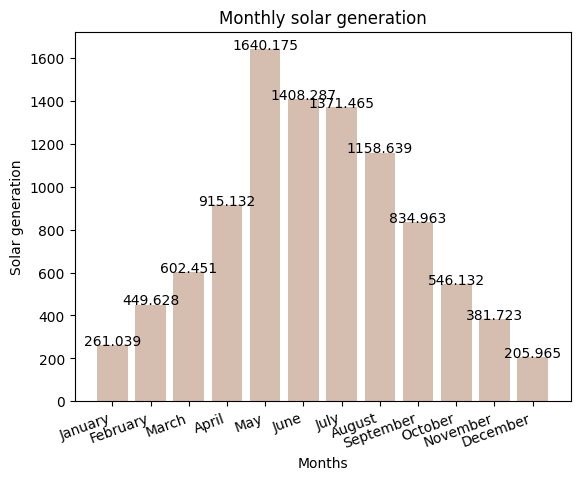

In [21]:
# Extracting months from the datetime column
electricity_consumption_data['month'] = electricity_consumption_data['date_hour_start'].dt.month

#Grouping by months to get monthly solar generation and aggregating by solar_electricity_generation_kwh
monthly_solar_generation = electricity_consumption_data.groupby('month')['solar_electricity_generation_kwh'].sum().reset_index()

#Ploting a bar graph to show this
values = monthly_solar_generation["solar_electricity_generation_kwh"]
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly solar generation")
plt.xlabel("Months")
plt.ylabel("Solar generation")
plt.bar(labels,values,color=('#d5bdaf'))
plt.xticks(rotation = 20, ha='right')

for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

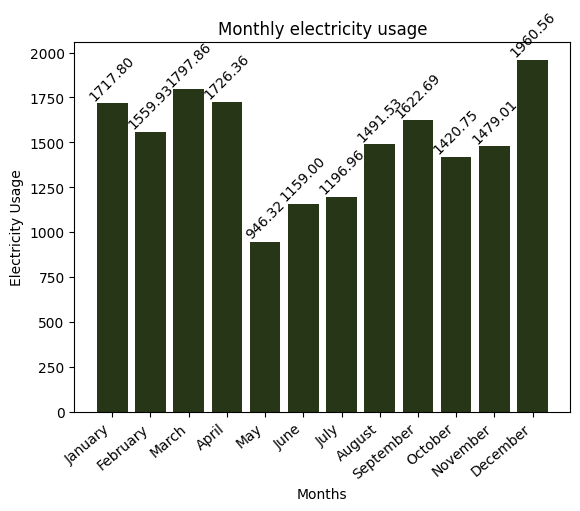

In [22]:
# Monthly electricity usage

#Grouping by months to get monthly electricity usage and aggregating by electricity_usage_kwh
monthly_electicity_usage = electricity_consumption_data.groupby('month')['electricity_usage_kwh '].sum().reset_index()

#Ploting a bar graph to show this
values = monthly_electicity_usage['electricity_usage_kwh ']
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly electricity usage")
plt.xlabel("Months")
plt.ylabel("Electricity Usage")
plt.bar(labels,values,color=('#283618'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=45, va='bottom')
   


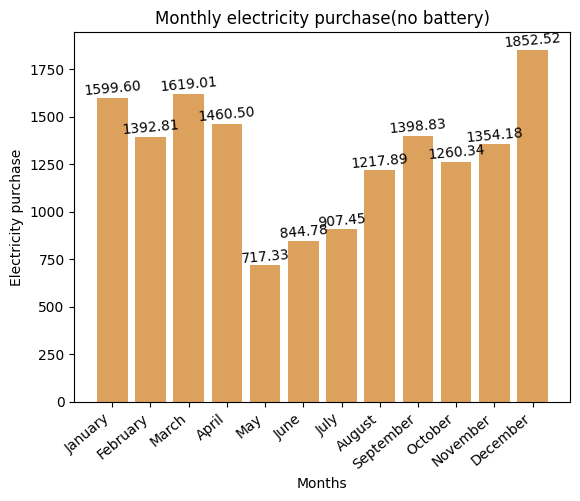

In [23]:
#monthly electricity purchased from the electricity provider (no battery)

#Grouping by months to get monthly electricity usage and aggregating by electricity_usage_kwh
monthly_electicity_purchase = electricity_consumption_data.groupby('month')['net_electricity'].sum().reset_index()

#Purchase of electricity happened when the net electricity was negative
purchase_of_electricity = electricity_consumption_data[electricity_consumption_data["net_electricity"] < 0]
purchase_of_electricity

#Grouping by months to get monthly electricity usage and aggregating by net_electricity
monthly_electicity_purchase = purchase_of_electricity.groupby('month')['net_electricity'].sum().reset_index()

#Ploting a bar graph to showing monthly_electricity_usage and taking the absolute 
values = monthly_electicity_purchase['net_electricity'].abs()
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly electricity purchase(no battery)")
plt.xlabel("Months")
plt.ylabel("Electricity purchase")
plt.bar(labels,values,color=('#dda15e'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=5, va='bottom')
   

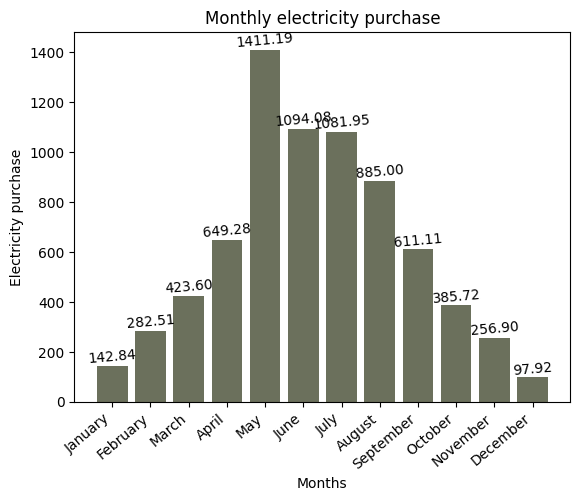

In [26]:
# monthly electricity purchased from the electricity provider (with battery)

#Grouping by months to get monthly electricity usage and aggregating by electricity_usage_kwh
monthly_electicity_purchase_b = electricity_consumption_data.groupby('month')['net_electricity'].sum().reset_index()

#Purchase of electricity happened when the net electricity was negative
purchase_of_electricity_b = electricity_consumption_data[electricity_consumption_data["net_electricity"] > 0]

#Grouping by months to get monthly electricity usage and aggregating by net_electricity
monthly_electicity_purchase_b = purchase_of_electricity_b.groupby('month')['net_electricity'].sum().reset_index()

#Ploting a bar graph to showing monthly_electicity_usage
values = monthly_electicity_purchase_b['net_electricity']
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly electricity purchase")
plt.xlabel("Months")
plt.ylabel("Electricity purchase")
plt.bar(labels,values,color=('#6b705c'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=5, va='bottom')
   

In [27]:
# Initial investment cost for battery installation
initial_investment = 5000  # Replace with the actual value

# Discount rate 
discount_rate = 0.04  

# Number of years for projection
projection_years = 20

# Scenario 1: Electricity prices increase by 4% p.a.
electricity_price_increase_1 = 0.04

# Scenario 2: Electricity price increases start at 4% p.a. and rise by 0.25% p.a.
electricity_price_increase_2_start = 0.04
electricity_price_increase_2_increment = 0.0025


In [28]:
#Grabbing the wrangled data for further analysis In Bi Tools(Power Bi/Tableau)
electricity_consumption_data[['hour', 'date_hour_start', 'solar_electricity_generation_kwh','electricity_usage_kwh ', 'net_electricity', 'month']].to_csv("cleaned_electricity_consumption_data.csv")